In [17]:
"""
                                             Data Story
I will investigate a few facts using the dataset downloaded from  UCI Machine Learning Repository in the following
link:
https://archive.ics.uci.edu/ml/datasets/adult

The dataset comes with factors (predictor variables) that help an individual to become rich (response variable). 
After wrangling, the dataset has 30,161 rows with fourteen features. This is a labelled dataset with a response 
variable rich. A person is rich if he or she makes more than $50,000 otherwise the person is not rich.

Investigation I
Do males more make money than their female counterparts? It is a well-established fact that a male makes more
money than his female-counterpart with same education level, experience and job title/position.
I will explore this fact in my analysis.

Investigation II
Do never-married  individuals make more money than others? It is interesting to see whether a family helps or not.
For appropriate analysis we will include only participants above age 35

Investigation III
Does higher education help to make more money? Obviously, it does. I will explore this issue in my analysis.

"""

'\n                                             Data Story\nI will investigate a few facts using the dataset downloaded from  UCI Machine Learning Repository in the following\nlink:\nhttps://archive.ics.uci.edu/ml/datasets/adult\n\nThe dataset comes with factors (predictor variables) that help an individual to become rich (response variable). \nAfter wrangling, the dataset has 30,161 rows with fourteen features. This is a labelled dataset with a response \nvariable rich. A person is rich if he or she makes more than $50,000 otherwise the person is not rich.\n\nInvestigation I\nDo males more make money than their female counterparts? It is a well-established fact that a male makes more\nmoney than his female-counterpart with same education level, experience and job title/position.\nI will explore this fact in my analysis.\n\nInvestigation II\nDo never-married  individuals make more money than others? It is interesting to see whether a family helps or not.\nFor appropriate analysis we wi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


#help(pd.read_csv)
df=pd.read_csv(r"C:\users\Mushtaq\input\\adult.csv",sep='\s*,\s*',header=0, encoding='ascii', engine='python')

# Let's change the name of the few columns to make them more interesting and meaningful.
df=df.rename({'39':'age'}, axis=1)
df=df.rename({'State-gov':'work_class'}, axis=1)
df=df.rename({'13':'yrs_edu'}, axis=1)
df=df.rename({'Never-married':'marital_stat'}, axis=1)
df=df.rename({'Bachelors':'edu_level'},axis=1)
df=df.rename({'Adm-clerical':'occupation'},axis=1)
df=df.rename({'White':'race'},axis=1)
df=df.rename({'Male':'gender'},axis=1)
df=df.rename({'2174':'capital_gain'},axis=1)
df=df.rename({'0':'capital_loss'},axis=1)
df=df.rename({'40':'hrs_week'},axis=1)
df=df.rename({'United-States':'native_country'},axis=1)
df=df.rename({'Not-in-family':'family_stat'},axis=1)
df=df.rename({'<=50K':'target'},axis=1)
del df['77516']# sample type information is deleted
df.head()


,age,work_class,edu_level,yrs_edu,marital_stat,occupation,family_stat,race,gender,capital_gain,capital_loss,hrs_week,native_country,target
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Are there missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
age               32560 non-null int64
work_class        32560 non-null object
edu_level         32560 non-null object
yrs_edu           32560 non-null int64
marital_stat      32560 non-null object
occupation        32560 non-null object
family_stat       32560 non-null object
race              32560 non-null object
gender            32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hrs_week          32560 non-null int64
native_country    32560 non-null object
target            32560 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [4]:
# Let's take care of the missing values
# Delete the missing values as all missing are in three columns of the same row
import numpy as np
df['work_class'].replace('?',np.nan,inplace=True)
df['occupation'].replace('?',np.nan,inplace=True)
df['native_country'].replace('?',np.nan,inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

age               0
work_class        0
edu_level         0
yrs_edu           0
marital_stat      0
occupation        0
family_stat       0
race              0
gender            0
capital_gain      0
capital_loss      0
hrs_week          0
native_country    0
target            0
dtype: int64

In [5]:
df.shape

(30161, 14)

In [6]:
# Investigation I: Do males make more money than their famle-counterparts with same education and job positions
# We will target those individulas with eductional achievement bachelor degree and above and same job titles: Exec-managerial and 
# Prof-specialty. 

In [7]:
# pull out data for Investigation I

get_ed=df[(df['edu_level']=='Bachelors')|(df['edu_level']=='Masters')|(df['edu_level']=='Doctorate')|(df['edu_level']=='Prof-school')]
data1=get_ed[(get_ed['occupation']=='Exec-managerial')|(get_ed['occupation']=='Prof-specialty')]
data1.shape

(4951, 14)

In [8]:
#write a function that will return percent of a binary catagorical variables and the target variable rich or not.
# we can use this function frequently in this analysis

def find_percent(frame, col1,col2): # col1 and col2 should be binary catagorical variables
    capture=frame.groupby([col1,col2])[col1].count().to_dict()
    listthem=[]
    for key, value in capture.items():
        temp=key
        first=temp[0]
        second=temp[1]
        listtemp=[]
        listtemp.append(first)
        listtemp.append(second)
        listtemp.append(value)
        listthem.append(listtemp)
        listtemp=[]
    col1_first=listthem[0][2]+listthem[1][2]
    col1_first_pecent_over50K=listthem[1][2]/col1_first*100
    col1_second=listthem[2][2]+listthem[3][2]
    col1_second_pecent_over50K=listthem[3][2]/col1_second*100
    x=[listthem[0][0],listthem[2][0]]

    y=[col1_first_pecent_over50K,col1_second_pecent_over50K]
    return x,y


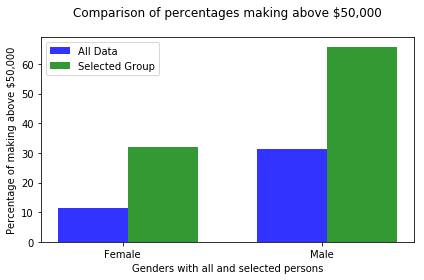

In [14]:
# visual display of Investigation I
# invoke the function on data1: male and female with same two occupation and higher level education: 
#Bachelor and above. We will look at two groups: all persons and selected persons as mentioned above

import numpy as np
import matplotlib.pyplot as plt

# pull the data again

allx,ally=find_percent(df,'gender','target')# all data
selectedx, selectedy=find_percent(data1,'gender','target')# selected data

plt.show()
# create plot
index = np.arange(2)
fig, ax = plt.subplots()
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

alldata = plt.bar(allx, ally, bar_width,
alpha=opacity,
color='b',
label='All Data')

selected = plt.bar(index + bar_width, selectedy, bar_width,
alpha=opacity,
color='g',
label='Selected Group')
plt.xlabel('Genders with all and selected group')
plt.ylabel('Percentage of making above $50,000')
plt.title('Comparison of percentages making above $50,000\n')
plt.xticks(index + bar_width-.2, ('Female','Male'))
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Conclusion to Analysis I: The data suggests the established fact that male makes more than his female counterpart
#with similar background. Our anaysis shows that only 32% females make above $50,000 whereas 63% of their
#counterparts make $50,000 when considering a selected group with college education and special job titles.The gap 
# is higher (11% to 34%) when we consider the wohole population.

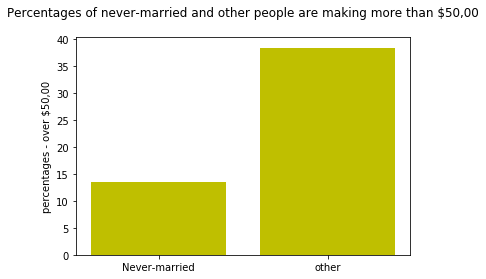

In [16]:
#Investigation II
# Do never-married are richer than others. We consider only persons older than 35.
#pull data now
married_data=df.copy()
married_data['change_marital']=df['marital_stat'].apply(lambda x: 'other' if x!='Never-married' else x)
married_data=married_data[married_data['age']>35]
married_data['change_marital'].value_counts()
x,y=find_percent(married_data, 'change_marital','target')
plt.bar(x,y, color='y')
plt.ylabel('percentages - over $50,00')
plt.title('Percentages of never-married and other people are making more than $50,00\n')

plt.show()



In [ ]:
#Conclusion to Investigation II: Less than 14% of never-married individuals as compared 39% of others make more 
#than $50,00. A hypothesis could be that being married helps to become rich.

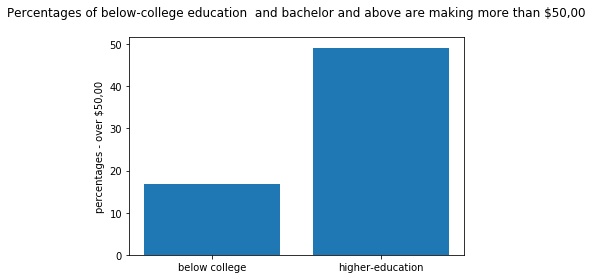

In [12]:
#Investigation III
# Is there any relationship between higher education and being rich
# pull the data
data3=df.copy()
data3['change_education']=data3['edu_level'].apply(lambda x: 'higher-education' if x=='Bachelors' or x=='Masters' or x=='Doctorate' or x=='Prof-school' else 'below college')
data3['change_target']=data3['target'].apply(lambda x: 'rich' if x=='>50K' else 'not-rich')
x,y =find_percent(data3,'change_education','change_target')
plt.bar(x,y)
plt.ylabel('percentages - over $50,00')
plt.title('Percentages of below-college education  and bachelor and above are making more than $50,00\n')
plt.show()




In [ ]:
#Conclusion to Investigation III: This just establishes the fact that higher education helps to make more money.
#Our result indicates that only 18% of below-college educated as compared to 49% of college and above education
# make more than $50,000